<a href="https://colab.research.google.com/github/AdityaPunetha/ML-Projects/blob/main/TensorFlow-Autoencoder_Denoise_MNIST/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [2]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data

In [8]:
(x_train, _), (x_test, _) = load_data()

In [9]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [10]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=x_train.shape
)
x_test_noisy = x_test + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=x_test.shape
)
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=x_train.shape
)
x_test_noisy = x_test + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=x_test.shape
)

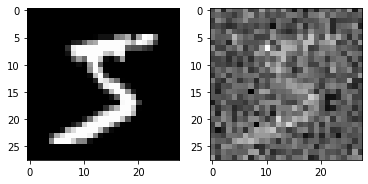

In [23]:
sample = x_train[0]
noisy_sample = x_train_noisy[0]

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(np.squeeze(sample), cmap="gray")
f.add_subplot(1, 2, 2)
plt.imshow(np.squeeze(noisy_sample), cmap="gray")
plt.show(block=True)

# Model

In [24]:
model = Sequential()
model.add(
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1))
)
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))


model.add(MaxPooling2D((2, 2), padding="same"))

model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation="relu", padding="same"))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation="relu", padding="same"))

model.compile(optimizer="adam", loss="mean_squared_error")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

# Train



In [26]:
model.fit(
    x_train_noisy,
    x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test),
)

Epoch 1/10
235/235 [==============================] - 114s 481ms/step - loss: 0.0483 - val_loss: 0.0355
Epoch 2/10
235/235 [==============================] - 113s 482ms/step - loss: 0.0326 - val_loss: 0.0299
Epoch 3/10
235/235 [==============================] - 112s 478ms/step - loss: 0.0287 - val_loss: 0.0277
Epoch 4/10
235/235 [==============================] - 116s 494ms/step - loss: 0.0265 - val_loss: 0.0255
Epoch 5/10
235/235 [==============================] - 116s 496ms/step - loss: 0.0251 - val_loss: 0.0243
Epoch 6/10
235/235 [==============================] - 112s 476ms/step - loss: 0.0239 - val_loss: 0.0231
Epoch 7/10
235/235 [==============================] - 112s 477ms/step - loss: 0.0231 - val_loss: 0.0225
Epoch 8/10
235/235 [==============================] - 113s 481ms/step - loss: 0.0224 - val_loss: 0.0217
Epoch 9/10
235/235 [==============================] - 112s 477ms/step - loss: 0.0218 - val_loss: 0.0216
Epoch 10/10
235/235 [==============================] - 113s 479m

# Eval

In [27]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.0209


0.020877284929156303

In [28]:
no_noise_img = model.predict(x_test_noisy)

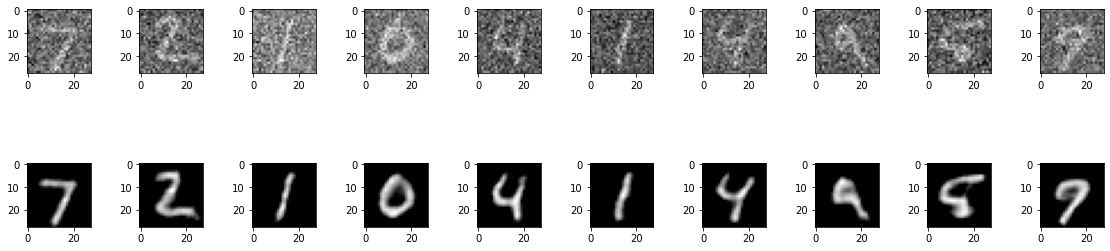

In [30]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")

    ax = plt.subplot(3, 20, 40 + i + 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="gray")

# Save

In [31]:
model.save("autoencoder_denoise_mnist")

INFO:tensorflow:Assets written to: autoencoder_denoise_mnist/assets


In [32]:
!zip -r /content/autoencoder_denoise_mnist.zip /content/autoencoder_denoise_mnist

  adding: content/autoencoder_denoise_mnist/ (stored 0%)
  adding: content/autoencoder_denoise_mnist/saved_model.pb (deflated 90%)
  adding: content/autoencoder_denoise_mnist/assets/ (stored 0%)
  adding: content/autoencoder_denoise_mnist/keras_metadata.pb (deflated 94%)
  adding: content/autoencoder_denoise_mnist/variables/ (stored 0%)
  adding: content/autoencoder_denoise_mnist/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: content/autoencoder_denoise_mnist/variables/variables.index (deflated 71%)
